📄 Dans cette page, je vais décrire le processus de nettoyage pour le sous-ensemble de données concernant **l'État de santé**

---

## I. Morbidité chronique auto-déclarée *(DataSet Groupe)* : Hamza OUADOUD

1. **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et statut au **regard de l'emploi**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Importation des bibliothèques nécessaires  :**

In [1]:
import numpy as np
import pandas as pd
import eurostat
import random
import markdown
from IPython.display import display,HTML

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [2]:
df = eurostat.get_data_df('hlth_silc_04')
df.sample(4)

,freq,unit,wstatus,age,sex,geo\TIME_PERIOD,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
10597,A,PC,POP,Y55-64,M,HR,NaN,NaN,44.3,43.8,...,44.4,47.6,47.1,49.8,50.6,50.9,47.8,47.3,42.4,44.3
17178,A,PC,UNE,Y45-54,F,NL,69.6,NaN,84.8,78.1,...,63.2,58.0,66.0,65.2,77.2,73.4,65.9,56.3,77.9,71.4
18465,A,PC_POP,NEMP,Y16-64,F,RS,NaN,NaN,NaN,NaN,...,26.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3574,A,PC,INAC_OTH,Y45-64,M,EU28,NaN,NaN,78.9,79.1,...,82.3,85.3,82.8,82.3,84.4,83.8,NaN,NaN,NaN,NaN


* Description des données : 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18744 entries, 0 to 18743
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             18744 non-null  object 
 1   unit             18744 non-null  object 
 2   wstatus          18744 non-null  object 
 3   age              18744 non-null  object 
 4   sex              18744 non-null  object 
 5   geo\TIME_PERIOD  18744 non-null  object 
 6   2008             6548 non-null   float64
 7   2009             10711 non-null  float64
 8   2010             11800 non-null  float64
 9   2011             11798 non-null  float64
 10  2012             11651 non-null  float64
 11  2013             12079 non-null  float64
 12  2014             12692 non-null  float64
 13  2015             12417 non-null  float64
 14  2016             12616 non-null  float64
 15  2017             11538 non-null  float64
 16  2018             12019 non-null  float64
 17  2019        

* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes avec des types de données inappropriés.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles : 

In [4]:
df = df[['geo\\TIME_PERIOD','age','sex','wstatus','2019']]
df.head(4)

,geo\TIME_PERIOD,age,sex,wstatus,2019
0,AL,Y16-24,F,EMP,NaN
1,AT,Y16-24,F,EMP,10.4
2,BE,Y16-24,F,EMP,NaN
3,BG,Y16-24,F,EMP,NaN


* Renommage des colonnes :

In [5]:
df = df.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'wstatus':'Activité_situation'
})
df.head(1)

,Geo,age,sex,Activité_situation,2019
0,AL,Y16-24,F,EMP,NaN


* Remplacement des codes pays par leur nom complet :

In [6]:
ds1_coutry_code = {
    "EU": "European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)",
    "EU27_2020": "European Union - 27 countries (from 2020)",
    "EU28": "European Union - 28 countries (2013-2020)",
    "EU27_2007": "European Union - 27 countries (2007-2013)",
    "EA": "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Euro area – 20 countries (from 2023)",
    "EA19": "Euro area - 19 countries  (2015-2022)",
    "EA18": "Euro area - 18 countries (2014)",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "ME": "Montenegro",
    "MK": "North Macedonia",
    "AL": "Albania",
    "RS": "Serbia",
    "TR": "Türkiye",
    "XK": "Kosovo*"
}

df['Geo'] = df['Geo'].replace(ds1_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [7]:
for i in range(len(df)) : 
    if df.loc[i,'sex'] == 'M' : 
        df.loc[i,'sex'] = 'Male'
    elif df.loc[i,'sex'] == 'F' : 
        df.loc[i,'sex'] ='Female'
    else : 
        df.loc[i,'sex'] = 'Total'

* Remplacement des codes d'activité :


In [8]:
# Suppression des lignes où 'Activité_situation' contient 'EMP' ou 'INAC_OTH'
df = df[~df['Activité_situation'].isin(['EMP', 'INAC_OTH'])]

ds1_activity_code = {
    "POP": "Population",
    "SAL": "Salariés",
    "NSAL": "Personnes_occupées_sauf_salariés",
    "NEMP": "Personnes_non_occupées",
    "UNE": "Chômeurs",
    "RET": "Retraités",
}

# Remplacer les codes dans 'Activité_situation' par les descriptions complètes
df['Activité_situation'] = df['Activité_situation'].replace(ds1_activity_code)

* Remplissage des valeurs manquantes pour l'année 2018 :


In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018)
df['2019'] = df.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df = df[df['2019'].notna()]  

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [10]:
df = df[df['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [11]:
df.head(7)

,Geo,age,sex,Activité_situation,2019
4680,Albania,Y16-24,Total,Personnes_non_occupées,2.3
4681,Austria,Y16-24,Total,Personnes_non_occupées,22.6
4682,Belgium,Y16-24,Total,Personnes_non_occupées,10.6
4683,Bulgaria,Y16-24,Total,Personnes_non_occupées,3.7
4684,Switzerland,Y16-24,Total,Personnes_non_occupées,16.7
4685,Cyprus,Y16-24,Total,Personnes_non_occupées,9.0
4686,Czechia,Y16-24,Total,Personnes_non_occupées,9.9


* Pivotage des données :

In [12]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df = df.pivot_table(
    index=['Geo'],  
    columns='Activité_situation',  
    values='2019',  
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df = pivot_df.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df = pivot_df.round(2)

pivot_df.head(6)

Activité_situation,Geo,Chômeurs,Personnes_non_occupées,Personnes_occupées_sauf_salariés,Population,Retraités,Salariés
0,Albania,15.52,33.49,24.14,28.33,58.25,12.95
1,Austria,54.72,50.06,32.65,40.13,65.61,26.45
2,Belgium,35.54,37.41,20.48,26.99,38.24,18.02
3,Bulgaria,14.22,31.85,19.85,24.14,52.12,21.67
4,Croatia,37.78,46.99,32.42,38.96,74.52,22.07
5,Cyprus,50.74,55.69,56.42,46.76,83.20,36.65


* Sauvegarder le résultat


In [13]:
pivot_df.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2018.xlsx', index=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Application des Methodes**

Dans cette section, nous allons appliquer deux méthodes d'analyse de données sur le premier dataset nettoyé : *l'Analyse en Composantes Principales (ACP)* et le *Clustering K-Means.* 

L'objectif est de réduire la dimensionnalité des données avec l'ACP et de segmenter les données en clusters distincts avec K-Means.

* Justification de l'ACP

    * <u>Réduction de la Dimensionnalité</u> : Les données contiennent plusieurs variables (comme les taux de chômage, de population, etc.), et l'ACP permet de réduire ces variables tout en conservant la majorité de l'information.

    * <u>Visualisation</u> : L'ACP facilite la visualisation des données, ce qui est utile pour identifier des tendances et des clusters.


* Application

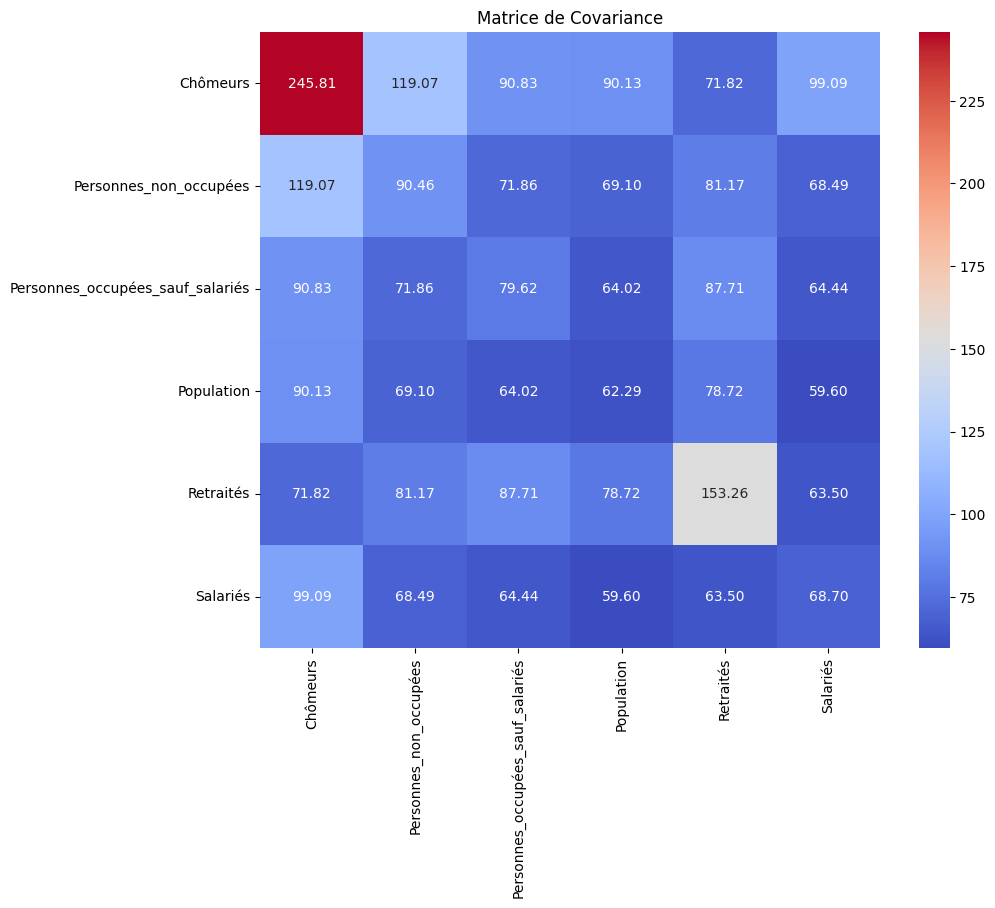

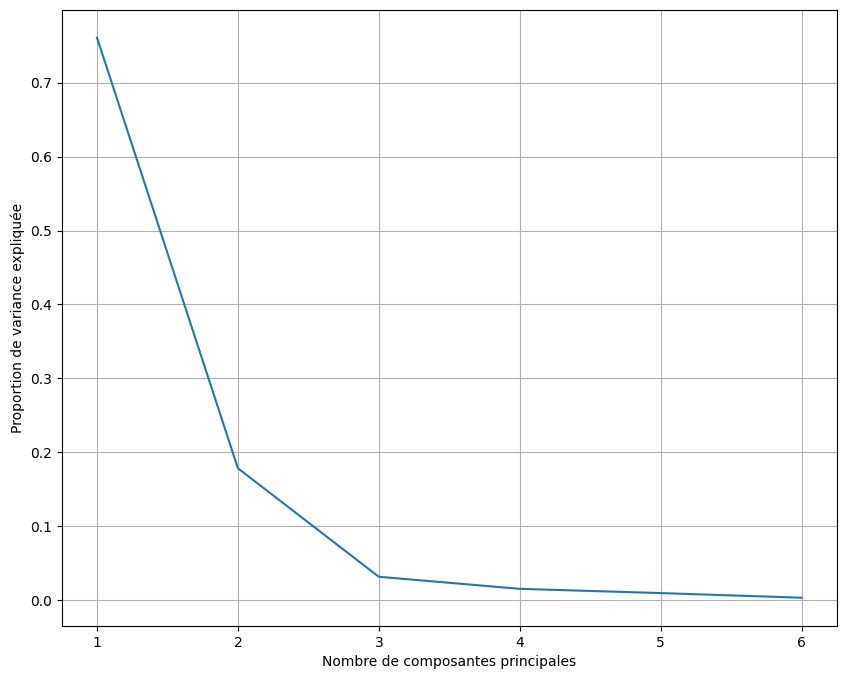

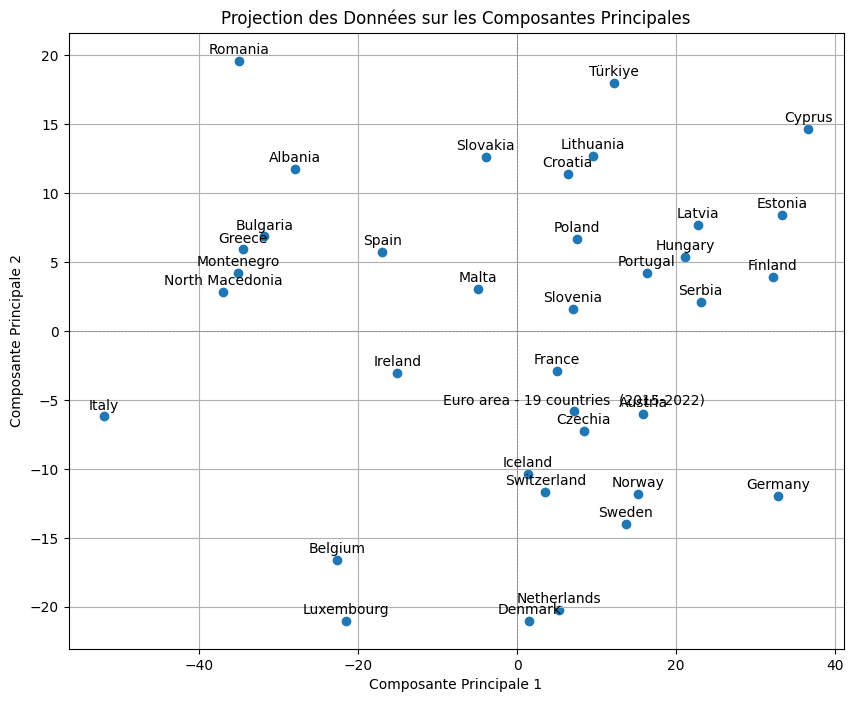

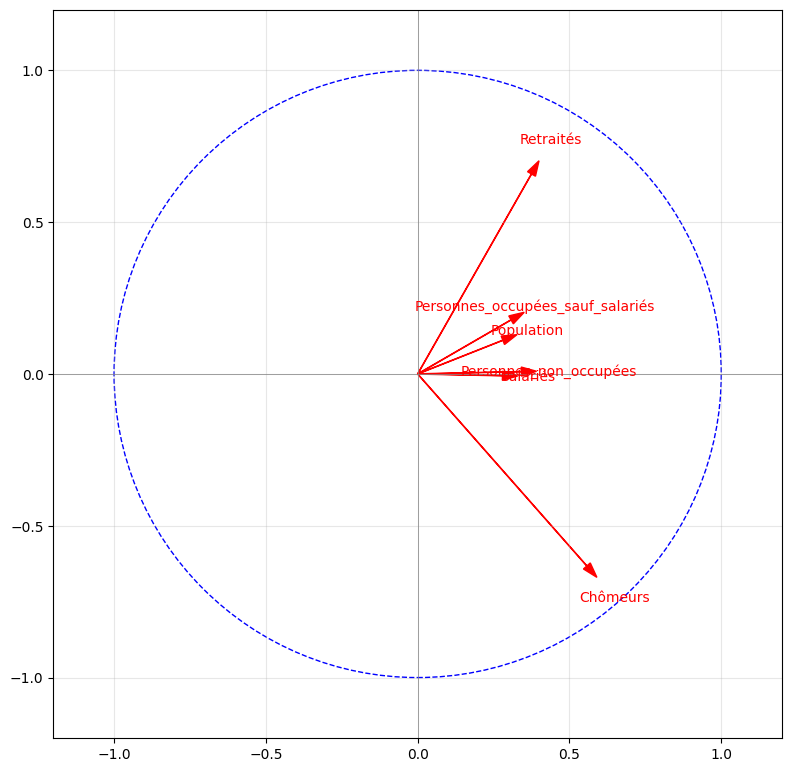

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Sélectionner les variables numériques
features = pivot_df.columns[1:]

# Liste des payes à exclure , je vais exclus ces payes car sa nom est tres longue
excluded_entities = [
    "European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)",
    "European Union - 27 countries (from 2020)",
    "European Union - 28 countries (2013-2020)",
    "European Union - 27 countries (2007-2013)",
    "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "Euro area – 20 countries (from 2023)",
    "Euro area - 19 countries (2015-2022)",
    "Euro area - 18 countries (2014)"
]

pivot_df = pivot_df[~pivot_df['Geo'].isin(excluded_entities)]

# Standardisation des données (ACP non normée car les données sont en pourcentage)
X = pivot_df[features].values

# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X)

# Matrice de covariance
cov_matrix = np.cov(X.T)

# Visualisation de la matrice de covariance avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=features, yticklabels=features)
plt.title('Matrice de Covariance')
plt.show()

display(HTML("""
<p><b>Interprétation :</b> On a par exemple les chômeurs et les personnes non occupées ont une forte interdépendance positive (119.07), 
tandis que les retraités et les salariés montrent une faible relation (63.50). Les autres relations sont modérées.</p>
"""))

# Inertie expliquée par chaque composant
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.grid()
plt.show()

display(HTML("""
<p><b>Interprétation :</b> Comme nous pouvons le voir les premiers composants expliquent une grande partie de la variance des données. Cela suggère que les données peuvent être résumées de manière efficace en utilisant un nombre réduit de composants.</p>
"""))

# Graphe des pays avec leur nom
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i in range(len(pivot_df)):
    plt.annotate(pivot_df['Geo'].iloc[i], (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

display(HTML("""
<p><b>Interprétation :</b> Ce graphe montre la projection des données sur les composantes principales. Les pays qui sont proches les uns des autres sur le graphe ont des caractéristiques similaires par exemple il y a une grande similairité entre Slovaquie, la Lituanie et la Croatie, tandis que les pays qui sont éloignés les uns des autres ont des caractéristiques différentes.</p>
"""))

# Cercle de corrélation
def plot_correlation_circle(pca, features, figsize=(8, 8)):
    # Ne prendre que les deux premières composantes
    n_comp = 2
    
    # Calculer les corrélations entre les variables et les composantes
    correlations = np.zeros((len(features), n_comp))
    for i in range(len(features)):
        correlations[i, :] = pca.components_[:n_comp, i] * np.sqrt(pca.explained_variance_[:n_comp])
    
    # Normaliser les corrélations
    scaling = np.sqrt(pca.explained_variance_[:n_comp])
    correlations = correlations / scaling
    
    # Créer la figure avec un aspect ratio égal
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')
    
    # Tracer le cercle unitaire en pointillés bleus
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='--', linewidth=1)
    ax.add_artist(circle)
    
    # Tracer les flèches et labels en rouge
    for i in range(len(features)):
        # Tracer les flèches
        ax.arrow(0, 0, correlations[i, 0], correlations[i, 1],
                head_width=0.03, head_length=0.05, 
                fc='red', ec='red', 
                length_includes_head=True)
        
        # Ajouter les labels sans fond
        x_text = correlations[i, 0] * 1.1
        y_text = correlations[i, 1] * 1.1
        ax.text(x_text, y_text, features[i], 
                color='red',
                ha='center', va='center')
    
    # Configurer les axes
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    
    # Configurer les limites
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    
    # Ajouter une grille
    plt.grid(True, linestyle='-', alpha=0.3)
    
    # Supprimer les labels des axes pour correspondre à l'exemple
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')
    
    # Ajuster les graduations
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    return correlations

# Utiliser la fonction
correlations = plot_correlation_circle(pca, features)
display(HTML("""
<p><b>Interprétation du cercle des corrélations :</b></p>
<p>Le cercle des corrélations met en évidence plusieurs relations importantes :</p>
<ul>
    <li>Les "Personnes_occupées_sauf_salariés" et la "Population" sont fortement corrélées positivement (flèches proches)</li>
    <li>Les "Retraités" et les "Chômeurs" sont corrélés négativement (flèches opposées)</li>
    <li>Les "Personnes_non_occupées" semblent moins bien représentées dans ce plan (flèche plus courte)</li>
</ul>
"""))


* Justification de K-means

    * <u>Classification des pays</u> : K-means est un algorithme de clustering qui peut aider à regrouper les pays en fonction de leurs similarités.
    * <u>Simplification de la visualisation</u> : En regroupant les pays en clusters, vous pouvez simplifier la visualisation des données et faciliter la compréhension des relations entre les variables.

* Application

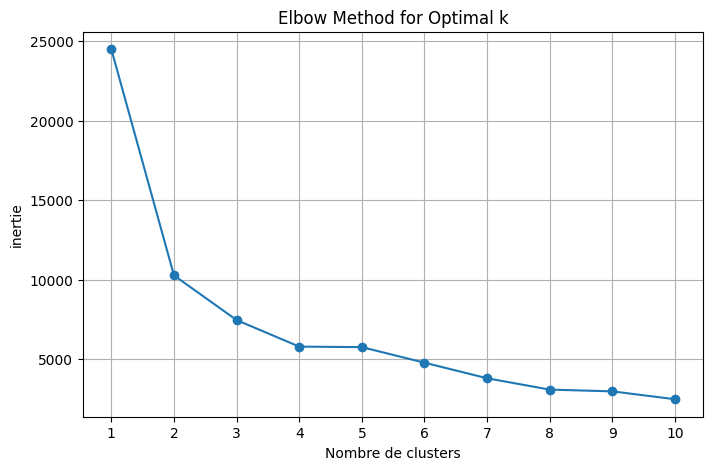

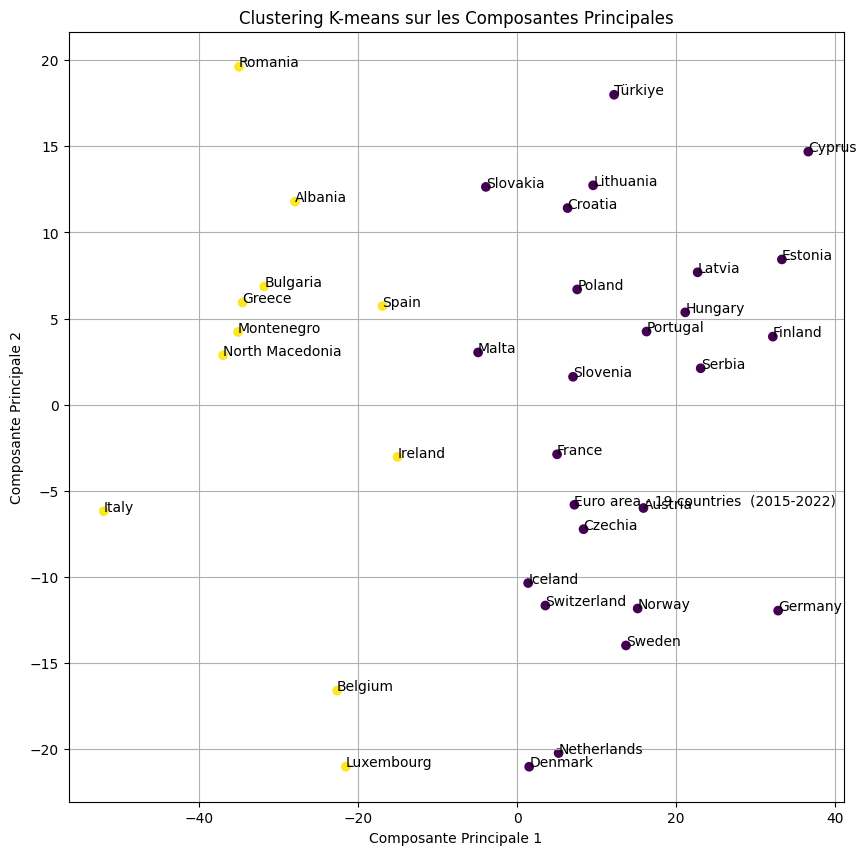

In [15]:
from sklearn.cluster import KMeans

# Calculer les inertie pour différents valeurs de k
inertie = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertie.append(kmeans.inertia_)

# Plotter la courbe des erreurs
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertie, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

display(HTML("""<p>
<b>Interprétation :</b> La courbe de coude montre l'inertie en fonction du nombre de clusters k dans l'algorithme K-means. On peut observer qu'il y a une réduction significative de l'inertie entre k=1 et k=2, puis une diminution plus lente et progressive après k=2. Ce "coude" à k=2 indique que l'ajout de clusters supplémentaires ne réduit plus de manière significative l'inertie, ce qui suggère que le nombre optimal de clusters pour ce dataset est
</p>Cela signifie qu'un regroupement en deux clusters est suffisant pour modéliser les données sans ajouter de complexité inutile
<p></p>"""))

# Appliquer K-means sur les nouvelles composantes principales
kmeans = KMeans(n_clusters=2)  # Définir le nombre de clusters (3 dans cet exemple)
kmeans.fit(X_pca)  # Entraîner le modèle sur les nouvelles composantes principales
labels = kmeans.labels_  # Obtenir les étiquettes de cluster pour chaque point

# Visualiser les résultats
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

for i, name in enumerate(pivot_df['Geo'].values):
    plt.annotate(name, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clustering K-means sur les Composantes Principales')
plt.grid()
plt.show()

# Interprétation du clustering
html_interpretation = """
<p><b>Interprétation du clustering :</b></p>
<p>Les clusters représentent des groupes de pays qui partagent des caractéristiques similaires en termes de santé et de bien-être. Les pays dans chaque cluster ont des profils de santé et de bien-être similaires, ce qui peut indiquer des facteurs communs qui influencent leur santé et leur bien-être.</p>
<p>Les clusters peuvent être utilisés pour identifier des pays qui ont des besoins de santé et de bien-être similaires, ce qui peut aider à cibler les interventions de santé publique.</p>
"""

# Afficher les interprétations et les résultats
display(HTML(html_interpretation))



-------------------------------------------------------------------

**2.** **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et **d'éducation atteint**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données brutes :

In [16]:
df2 = eurostat.get_data_df('hlth_silc_05')
df2.sample(4)

,freq,unit,isced11,age,sex,geo\TIME_PERIOD,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5326,A,PC,ED5-8,Y25-29,M,IS,11.1,17.9,24.6,3.8,...,24.4,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6628,A,PC,ED5-8,Y_GE16,T,CH,29.0,29.1,30.6,30.4,...,34.5,32.8,34.2,33.4,31.2,31.3,33.1,34.4,36.3,36.3
7913,A,PC,TOTAL,Y25-64,F,RO,NaN,NaN,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9043,A,PC,TOTAL,Y_GE65,F,EU,60.0,60.3,60.1,60.8,...,61.9,63.4,62.4,62.9,62.9,61.8,NaN,NaN,NaN,NaN


* Description des données : 

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9624 entries, 0 to 9623
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             9624 non-null   object 
 1   unit             9624 non-null   object 
 2   isced11          9624 non-null   object 
 3   age              9624 non-null   object 
 4   sex              9624 non-null   object 
 5   geo\TIME_PERIOD  9624 non-null   object 
 6   2008             6659 non-null   float64
 7   2009             6678 non-null   float64
 8   2010             7352 non-null   float64
 9   2011             7360 non-null   float64
 10  2012             7289 non-null   float64
 11  2013             7565 non-null   float64
 12  2014             7970 non-null   float64
 13  2015             8223 non-null   float64
 14  2016             8110 non-null   float64
 15  2017             7332 non-null   float64
 16  2018             7510 non-null   float64
 17  2019          

* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles :

In [18]:
df2 = df2[['geo\\TIME_PERIOD','age','sex','isced11','2019']]
df2.sample(3)

,geo\TIME_PERIOD,age,sex,isced11,2019
9352,EA18,Y_GE85,M,TOTAL,67.9
2766,BG,Y16-64,F,ED3_4,14.4
5000,EL,Y16-44,F,ED5-8,4.5


* Renommage des colonnes : 

In [19]:
df2 = df2.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'isced11':'Type_Education'
})
df2.head(3)

,Geo,age,sex,Type_Education,2019
0,AL,Y16-24,F,ED0-2,4.0
1,AT,Y16-24,F,ED0-2,17.9
2,BE,Y16-24,F,ED0-2,14.2


* Remplacement des codes pays par leur nom complet :

In [20]:
ds2_coutry_code = {
    "EU": "Union européenne (UE6-1958, UE9-1973, UE10-1981, UE12-1986, UE15-1995, UE25-2004, UE27-2007, UE28-2013, UE27-2020)",
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "EU27_2007": "Union européenne - 27 pays (2007-2013)",
    "EA": "Zone euro (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Zone euro - 20 pays (à partir de 2023)",
    "EA19": "Zone euro - 19 pays (2015-2022)",
    "EA18": "Zone euro - 18 pays (2014)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "CH": "Suisse",
    "UK": "United Kingdom",
    "ME": "Monténégro",
    "MK": "Macédoine du Nord",
    "AL": "Albanie",
    "RS": "Serbie",
    "TR": "Turquie",
    "XK": "Kosovo*"
}
df2['Geo'] = df2['Geo'].replace(ds2_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [21]:
df2['sex'] = df2['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Remplacement des codes d'education :

In [22]:
# Suppression des lignes où 'Type_Education' contient 'TOTAL'
df2 = df2[~df2['Type_Education'].isin(['TOTAL'])]

ds2_education_code = {
    "ED0-2": "Niv_Primaire",
    "ED3_4": "Niv_Secondaire",
    "ED5-8": "Niv_Supérieur",
}

# Remplacer les codes dans 'Type_Education' par les descriptions complètes
df2['Type_Education'] = df2['Type_Education'].replace(ds2_education_code)
df2.sample(3)


,Geo,age,sex,Type_Education,2019
3970,Union européenne - 28 pays (2013-2020),Y65-74,Male,Niv_Secondaire,57.1
6236,Union européenne - 27 pays (2007-2013),Y55-64,Total,Niv_Supérieur,40.8
722,Belgique,Y25-34,Male,Niv_Primaire,22.4


* Remplissage des valeurs manquantes pour l'année 2019 :

In [23]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018)
df2['2019'] = df2.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df2 = df2[df2['2019'].notna()]  

C:\Users\titan\AppData\Local\Temp\ipykernel_4516\2480556863.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df2['2019'] = df2.groupby('Geo')['2019'].fillna(method='ffill')
C:\Users\titan\AppData\Local\Temp\ipykernel_4516\2480556863.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df2['2019'] = df2.groupby('Geo')['2019'].fillna(method='ffill')


* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [24]:
df2 = df2[df2['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage 

In [25]:
df2.head(7)

,Geo,age,sex,Type_Education,2019
90,Albanie,Y16-24,Total,Niv_Primaire,4.0
91,Autriche,Y16-24,Total,Niv_Primaire,19.3
92,Belgique,Y16-24,Total,Niv_Primaire,12.2
93,Bulgarie,Y16-24,Total,Niv_Primaire,3.1
94,Suisse,Y16-24,Total,Niv_Primaire,21.8
95,Chypre,Y16-24,Total,Niv_Primaire,10.9
97,Allemagne,Y16-24,Total,Niv_Primaire,18.7


* Pivotage des données :

In [26]:
pivot_df2 = df2.pivot_table(
    index=['Geo'],  
    columns='Type_Education',  
    values='2019',  
).reset_index()

pivot_df2 = pivot_df2.dropna()
# preserve 2 nombre aprés la virgule
pivot_df2 = pivot_df2.round(2)


pivot_df2.head(10)

Type_Education,Geo,Niv_Primaire,Niv_Secondaire,Niv_Supérieur
0,Albanie,32.55,26.91,32.13
1,Allemagne,49.12,43.37,38.51
2,Autriche,47.93,37.04,34.68
3,Belgique,34.11,25.28,20.81
4,Bulgarie,28.01,26.26,25.98
5,Chypre,54.96,43.17,38.99
6,Croatie,47.84,35.03,36.01
7,Danemark,37.14,31.89,30.82
8,Espagne,34.65,26.77,24.44
9,Estonie,55.50,44.73,45.14


* Sauvegarder le résultat

In [27]:
pivot_df2.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2018_Education.xlsx', index=False)

**3.** **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et **degré d'urbanisation**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [28]:
df3 = eurostat.get_data_df('hlth_silc_19')
df3.sample(5)

,freq,deg_urb,age,sex,unit,geo\TIME_PERIOD,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1552,A,DEG1,Y_GE16,M,PC,AT,17.0,21.2,18.2,18.5,...,34.5,35.8,36.4,36.9,34.5,36.7,35.8,34.6,34.6,32.9
5952,A,DEG3,Y_GE85,F,PC,SI,NaN,NaN,NaN,NaN,...,82.8,76.7,68.9,83.2,72.2,82.2,76.1,73.5,77.6,77.8
6756,A,TOTAL,Y25-34,T,PC,CZ,NaN,NaN,13.9,13.4,...,9.7,12.5,12.4,14.8,14.1,13.8,14.4,11.7,12.9,12.9
6900,A,TOTAL,Y35-44,T,PC,IE,16.4,15.9,18.8,16.9,...,18.0,18.1,17.9,17.6,18.4,18.5,18.0,21.3,20.0,19.7
1665,A,DEG1,Y_GE65,F,PC,MK,NaN,NaN,NaN,NaN,...,NaN,NaN,46.6,57.6,51.6,59.9,64.8,NaN,NaN,NaN


* Description des données : 

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             8052 non-null   object 
 1   deg_urb          8052 non-null   object 
 2   age              8052 non-null   object 
 3   sex              8052 non-null   object 
 4   unit             8052 non-null   object 
 5   geo\TIME_PERIOD  8052 non-null   object 
 6   2003             1046 non-null   float64
 7   2004             2524 non-null   float64
 8   2005             5029 non-null   float64
 9   2006             5101 non-null   float64
 10  2007             5599 non-null   float64
 11  2008             6015 non-null   float64
 12  2009             6016 non-null   float64
 13  2010             6639 non-null   float64
 14  2011             6634 non-null   float64
 15  2012             6697 non-null   float64
 16  2013             6854 non-null   float64
 17  2014          

* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles : 

In [30]:
df3 = df3[['geo\\TIME_PERIOD','sex','age','deg_urb','2019']]
df3.head(5)

,geo\TIME_PERIOD,sex,age,deg_urb,2019
0,CH,F,TOTAL,DEG1,NaN
1,DE,F,TOTAL,DEG1,NaN
2,CH,M,TOTAL,DEG1,NaN
3,DE,M,TOTAL,DEG1,NaN
4,CH,T,TOTAL,DEG1,NaN


* Renommage des colonnes :

In [31]:
df3 = df3.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'deg_urb':'Degré_urbanisation'
})
df3.head(2)

,Geo,sex,age,Degré_urbanisation,2019
0,CH,F,TOTAL,DEG1,NaN
1,DE,F,TOTAL,DEG1,NaN


* Remplacement des codes pays par leur nom complet :

In [32]:
ds3_coutry_code = {
    "EU": "Union européenne (UE6-1958, UE9-1973, UE10-1981, UE12-1986, UE15-1995, UE25-2004, UE27-2007, UE28-2013, UE27-2020)",
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "EU27_2007": "Union européenne - 27 pays (2007-2013)",
    "EA": "Zone euro (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Zone euro - 20 pays (à partir de 2023)",
    "EA19": "Zone euro - 19 pays (2015-2022)",
    "EA18": "Zone euro - 18 pays (2014)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "CH": "Suisse",
    "UK": "United Kingdom",
    "MK": "Macédoine du Nord",
    "AL": "Albanie",
    "RS": "Serbie"
}
df3['Geo'] = df3['Geo'].replace(ds3_coutry_code)

* Remplacement des codes de Degré d'urbanisation :

In [33]:
# Suppression des lignes où 'Activité_situation' contient 'TOTAL' 
df3 = df3[~df3['Degré_urbanisation'].isin(['TOTAL'])]

ds3_Degré_urbanisation_code = {
    "DEG1": "Villes",
    "DEG2": "Villes_moins_peuplées_et_banlieues",
    "DEG3": "Zones_rurales"
}

# Remplacer les codes dans 'Degré_urbanisation' par les descriptions complètes
df3['Degré_urbanisation'] = df3['Degré_urbanisation'].replace(ds3_Degré_urbanisation_code)

* Remplissage des valeurs manquantes pour l'année 2019 :

In [34]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018)
df3['2019'] = df3.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df3 = df3[df3['2019'].notna()]  

C:\Users\titan\AppData\Local\Temp\ipykernel_4516\3019896467.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df3['2019'] = df3.groupby('Geo')['2019'].fillna(method='ffill')
C:\Users\titan\AppData\Local\Temp\ipykernel_4516\3019896467.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df3['2019'] = df3.groupby('Geo')['2019'].fillna(method='ffill')


* Remplacement des codes de sexe par leur nom complet :

In [35]:
df3['sex'] = df3['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [36]:
df3 = df3[df3['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [37]:
df3.sample(6)

,Geo,sex,age,Degré_urbanisation,2019
2869,Union européenne - 28 pays (2013-2020),Total,Y35-44,Villes_moins_peuplées_et_banlieues,26.6
1222,Allemagne,Total,Y55-64,Villes,52.2
4870,Allemagne,Total,Y35-44,Zones_rurales,34.6
117,Lituanie,Total,Y16-24,Villes,19.5
5909,Suède,Total,Y_GE75,Zones_rurales,54.7
5367,Albanie,Total,Y65-74,Zones_rurales,49.3


* Pivotage des données :

In [38]:
pivot_df3 = df3.pivot_table(
    index=['Geo','age'],  
    columns='Degré_urbanisation',  
    values='2019',  
).reset_index()

pivot_df3 = pivot_df3.dropna()
# preserve 2 nombre aprés la virgule
pivot_df3 = pivot_df3.round(2)

pivot_df3.sample(7)

Degré_urbanisation,Geo,age,Villes,Villes_moins_peuplées_et_banlieues,Zones_rurales
447,Serbie,Y_GE85,68.3,71.3,86.6
88,Chypre,Y45-64,48.9,53.6,57.4
252,Islande,Y_GE16,34.4,37.3,30.3
340,Malte,Y25-29,8.6,7.3,70.1
651,Zone euro - 20 pays (à partir de 2023),Y_GE16,34.9,36.1,37.6
234,Irlande,Y65-74,49.0,51.2,38.8
105,Croatie,Y55-64,50.7,52.0,50.7


* Sauvegarder le résultat

In [39]:
pivot_df3.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2018_Degré_urbanisation.xlsx', index=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Application des Methodes**

Dans cette section, nous allons appliquer une méthodes d'analyse de données sur le troisieme dataset nettoyé : *ANONA* 

l'objectif est l'analyse de l'influence de l'age sur la pourcentage de problèmes de santé 

* Justification d' ANOVA

    * <u>Comparaison de moyennes</u> : En appliquant l'ANOVA, nous pourrons comparer les moyennes pour chaque groupe d'âge, afin de déterminer si les différences entre ces groupes sont significatives.

* Application : 

=== Analyse ANOVA des maladies chroniques par groupe d'âge ===



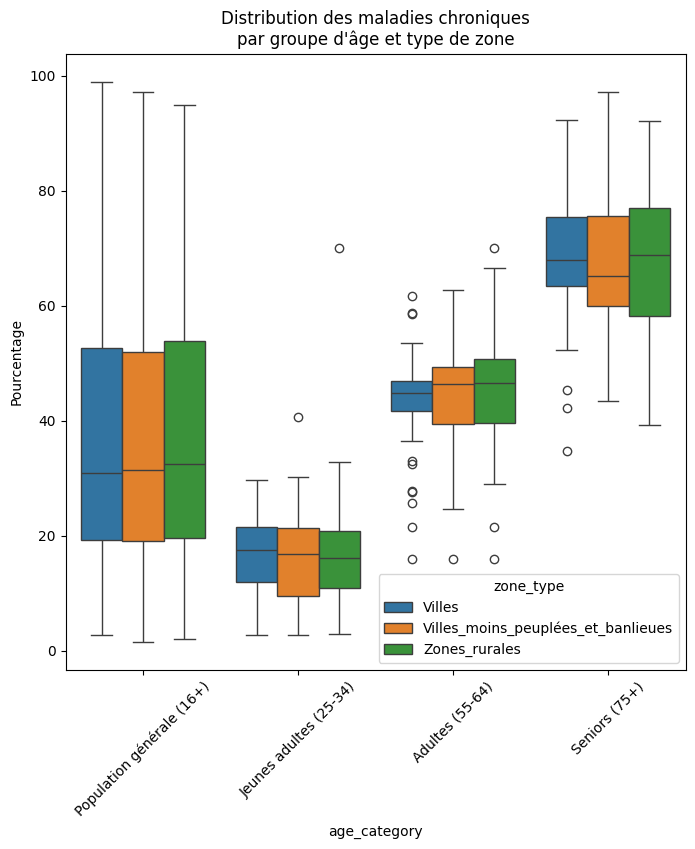

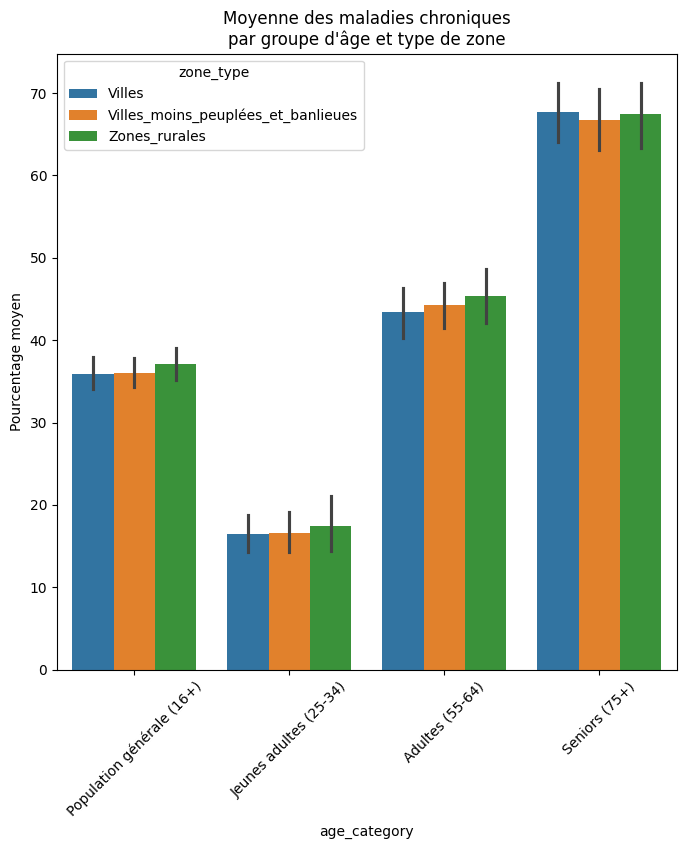

=== Test de Fisher (ANOVA) ===
Statistique F calculée : 136.567
F critique (α = 0.05) : 2.609
p-valeur : 0.000

Conclusion :
On a F critique > p-valeur
On rejette H0 : il y a une différence significative entre les groupes d'âge


In [40]:
from scipy import stats
from scipy.stats import f_oneway, levene

# Regroupement des âges en catégories
def categorize_age(age):
    if age == 'Y25-34':
        return 'Jeunes adultes (25-34)'
    elif age == 'Y55-64':
        return 'Adultes (55-64)'
    elif age == 'Y_GE75':
        return 'Seniors (75+)'
    else:
        return 'Population générale (16+)'

pivot_df3['age_category'] = pivot_df3['age'].apply(categorize_age)

# Préparation des données pour ANOVA
melted_df = pd.melt(pivot_df3, 
                    id_vars=['age_category', 'Geo'], 
                    value_vars=['Villes', 'Villes_moins_peuplées_et_banlieues', 'Zones_rurales'],
                    var_name='zone_type',
                    value_name='percentage')

# ANOVA à un facteur pour l'âge
print("=== Analyse ANOVA des maladies chroniques par groupe d'âge ===\n")


# ANOVA
age_groups = pivot_df3['age_category'].unique()
age_groups_data = [melted_df[melted_df['age_category'] == group]['percentage'] for group in age_groups]


# Visualisations
plt.figure(figsize=(8, 8))

# Boxplot
plt.plot()
sns.boxplot(x='age_category', y='percentage', hue='zone_type', data=melted_df)
plt.title('Distribution des maladies chroniques\npar groupe d\'âge et type de zone')
plt.xticks(rotation=45)
plt.ylabel('Pourcentage')


plt.figure(figsize=(8, 8))
# Barplot
plt.plot()
sns.barplot(x='age_category', y='percentage', hue='zone_type', data=melted_df)
plt.title('Moyenne des maladies chroniques\npar groupe d\'âge et type de zone')
plt.xticks(rotation=45)
plt.ylabel('Pourcentage moyen')
plt.show()


# Titre principal
display(HTML("""<p><b>Interprétation :</b></p>
<p><b>Tendance par âge :</b></p>
<ul>
    <li>On observe une augmentation claire et progressive des maladies chroniques avec l'âge.</li>
    <li>Les jeunes adultes (25-34 ans) présentent le taux le plus bas (~15%).</li>
    <li>Les seniors (75+) ont le taux le plus élevé (~65-70%).</li>
    <li>Cette progression est cohérente dans tous les types de zones.</li>
</ul>
<p><b>Comparaison entre zones :</b></p>
<ul>
    <li>Les différences entre types de zones (villes, banlieues, zones rurales) sont relativement faibles.</li>
    <li>La variabilité (représentée par les barres d'erreur et les boîtes à moustaches) est plus importante chez les seniors.</li>
    <li>Les zones rurales montrent une légère tendance à des taux plus élevés chez les adultes (55-64 ans).</li>
</ul>
<p><b>Répartition :</b></p>
<ul>
    <li>Les box plots révèlent une dispersion plus importante des données pour les seniors.</li>
    <li>La distribution semble plus resserrée pour les jeunes adultes.</li>
    <li>Quelques valeurs atypiques sont observées, particulièrement dans la catégorie adultes (55-64 ans).</li>
</ul>
"""))
# Réalisation du test ANOVA avec les données existantes
f_stat, p_value = stats.f_oneway(*age_groups_data)

# Calculons les degrés de liberté
k = len(age_groups_data)  # nombre de groupes
n_total = sum(len(group) for group in age_groups_data)
ddl1 = k - 1  # degrés de liberté inter-groupes
ddl2 = n_total - k  # degrés de liberté intra-groupes

# Obtenir la valeur critique de F pour α = 0.05
F_critique = stats.f.ppf(q=0.95, dfn=ddl1, dfd=ddl2)

print("=== Test de Fisher (ANOVA) ===")
print(f"Statistique F calculée : {f_stat:.3f}")
print(f"F critique (α = 0.05) : {F_critique:.3f}")
print(f"p-valeur : {p_value:.3f}")
print("\nConclusion :")
print("On a F critique > p-valeur")
if f_stat < F_critique:
    print("On accepte H0 : il n'y a pas de différence significative entre les groupes d'âge")
else:
    print("On rejette H0 : il y a une différence significative entre les groupes d'âge")


------------------------------------------------------------

**4.** **Personnes avec un problème de santé ou une maladie de longue durée**,  
   par sexe, âge et statut au **type de maladie et education**.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [41]:
df4 = eurostat.get_data_df('hlth_ehis_cd1e')
df4.sample(6)

,freq,unit,hlth_pb,isced11,sex,age,geo\TIME_PERIOD,2014,2019
80163,A,PC,STRK_CHR,ED3_4,M,Y65-74,LU,2.4,1.1
10862,A,PC,ARTHRO,TOTAL,M,Y_GE75,IS,29.0,25.4
6912,A,PC,ARTHRO,ED0-2,T,Y45-54,LV,10.1,14.8
70363,A,PC,LW_CHR_BACK,ED5-8,T,Y15-24,IS,NaN,NaN
45617,A,PC,HBLLIP,ED0-2,F,Y45-64,PL,NaN,13.5
87497,A,PC,URIN,ED5-8,T,Y15-64,NL,3.7,4.6


In [42]:
df4 = df4[['geo\\TIME_PERIOD','age','sex','hlth_pb','isced11','2019']]
df4.head(3)

,geo\TIME_PERIOD,age,sex,hlth_pb,isced11,2019
0,AT,TOTAL,F,ALLGY,ED0-2,19.0
1,BE,TOTAL,F,ALLGY,ED0-2,18.8
2,BG,TOTAL,F,ALLGY,ED0-2,4.4


* Renommage des colonnes :

In [43]:
df4 = df4.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'hlth_pb':'Problèmes_santé',
    'isced11':'Type_Education'
})
df4.head(1)

,Geo,age,sex,Problèmes_santé,Type_Education,2019
0,AT,TOTAL,F,ALLGY,ED0-2,19.0


* Remplacement des codes pays par leur nom complet :

In [44]:
ds4_coutry_code = {
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "UK": "United Kingdom",
    "RS": "Serbie",
    "TR": "Turquie"
}

df4['Geo'] = df4['Geo'].replace(ds4_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [45]:
df4['sex'] = df4['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Remplacement des codes d'education et type de malade :

In [46]:
ds4_maladie_code = {
    "ARTHRO": "Arthrose",
    "LW_CHR_BACK": "Dos_chronique",
    "NECK": "Cou_chronique",
    "ASTHMA": "Asthme",
    "CHR_LW_RES": "Resp_chronique",
    "HRT_CHR_ATK": "Crise_cardiaque",
    "CHRT_ANGPEC": "Mal_coronaire",
    "HBLPR": "HTA",
    "HBLLIP": "Lipides_haut",
    "STRK_CHR": "AVC",
    "CIRRHOSIS": "Cirrhose",
    "URIN": "Incontinence",
    "KIDNEY": "Reins",
    "DIAB": "Diabète",
    "ALLGY": "Allergie",
}

# Suppression des lignes où 'Type_Education' contient 'TOTAL'
df4 = df4[~df4['Type_Education'].isin(['TOTAL'])]

ds4_education_code = {
    "ED0-2": "Niv_Primaire",
    "ED3_4": "Niv_Secondaire",
    "ED5-8": "Niv_Supérieur",
}

# Remplacer les codes dans 'Problèmes_santé' par les descriptions complètes
df4['Problèmes_santé'] = df4['Problèmes_santé'].replace(ds4_maladie_code)

# Remplacer les codes dans 'Type_Education' par les descriptions complètes
df4['Type_Education'] = df4['Type_Education'].replace(ds4_education_code)

* Remplissage des valeurs manquantes pour l'année 2019 :

In [47]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2014)
df4['2019'] = df4.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df4 = df4[df4['2019'].notna()]  


C:\Users\titan\AppData\Local\Temp\ipykernel_4516\110357247.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df4['2019'] = df4.groupby('Geo')['2019'].fillna(method='ffill')
C:\Users\titan\AppData\Local\Temp\ipykernel_4516\110357247.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df4['2019'] = df4.groupby('Geo')['2019'].fillna(method='ffill')


* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [48]:
df4 = df4[df4['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [49]:
df4.sample(7)

,Geo,age,sex,Problèmes_santé,Type_Education,2019
1275,Portugal,Y45-64,Total,Allergie,Niv_Primaire,18.2
37927,Lituanie,Y15-29,Total,Diabète,Niv_Supérieur,0.0
86333,Estonie,Y_GE65,Total,Incontinence,Niv_Secondaire,10.2
2543,Union européenne - 27 pays (à partir de 2020),Y25-34,Total,Allergie,Niv_Secondaire,21.3
15390,Lituanie,Y35-44,Total,Asthme,Niv_Supérieur,1.8
6666,Union européenne - 27 pays (à partir de 2020),Y15-24,Total,Arthrose,Niv_Primaire,0.4
70317,Allemagne,TOTAL,Total,Dos_chronique,Niv_Supérieur,24.2


* Pivotage de dataFrame df4 :

In [50]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df4 = df4.pivot_table(
    index=['Geo'],  
    columns='Problèmes_santé',  
    values='2019',  
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df4 = pivot_df4.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df4 = pivot_df4.round(2)

pivot_df4.head(6)

Problèmes_santé,Geo,AVC,Allergie,Arthrose,Asthme,Cirrhose,Cou_chronique,Crise_cardiaque,DPR_CHR,Diabète,Dos_chronique,HTA,Incontinence,Lipides_haut,Mal_coronaire,Reins,Resp_chronique
0,Allemagne,1.95,31.47,14.52,7.86,0.43,20.83,2.11,11.43,7.61,27.96,23.29,7.43,18.77,3.86,2.28,5.40
1,Autriche,1.53,22.73,13.28,4.40,0.34,18.00,1.65,7.83,5.91,24.61,20.47,4.39,20.60,3.23,2.49,4.55
2,Belgique,0.64,18.70,17.66,5.55,0.80,13.60,0.72,6.84,5.66,23.31,16.46,4.46,20.89,1.33,0.85,3.70
3,Bulgarie,2.32,4.10,5.31,2.13,0.28,3.92,1.43,2.70,6.16,9.30,26.34,2.50,2.92,6.56,4.26,3.09
4,Chypre,1.62,7.09,10.12,3.90,0.26,9.69,3.32,5.26,7.96,15.51,20.90,3.65,24.55,2.35,2.37,3.04
5,Croatie,2.29,17.87,9.11,4.54,0.82,25.51,2.62,9.47,8.75,34.44,27.77,10.45,19.02,6.82,5.71,5.10


* Sauvegarder le résultat

In [51]:
pivot_df4.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_et_Type_Education_2019.xlsx', index=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Application des Methodes**

Dans cette section, nous allons appliquer deux méthodes d'analyse de données sur le quatriéme dataset nettoyé : *l'Analyse en Composantes Principales (ACP)* et le *Analyse Factorielle Discriminante (AFD)* 

L'objectif est de réduire la dimensionnalité des données avec l'ACP et de  discriminer et de segmenter les données en groupes distincts avec AFD.

* Justification de l'ACP

    * <u>Réduction de la Dimensionnalité</u> : Les données contiennent plusieurs variables (comme Allergie, Arthrose, Asthme, Cirrhose, etc.), et l'ACP permet de réduire ces variables tout en conservant la majorité de l'information.

    * <u>Visualisation</u> : L'ACP facilite la visualisation des données, ce qui est utile pour identifier des tendances et des clusters.

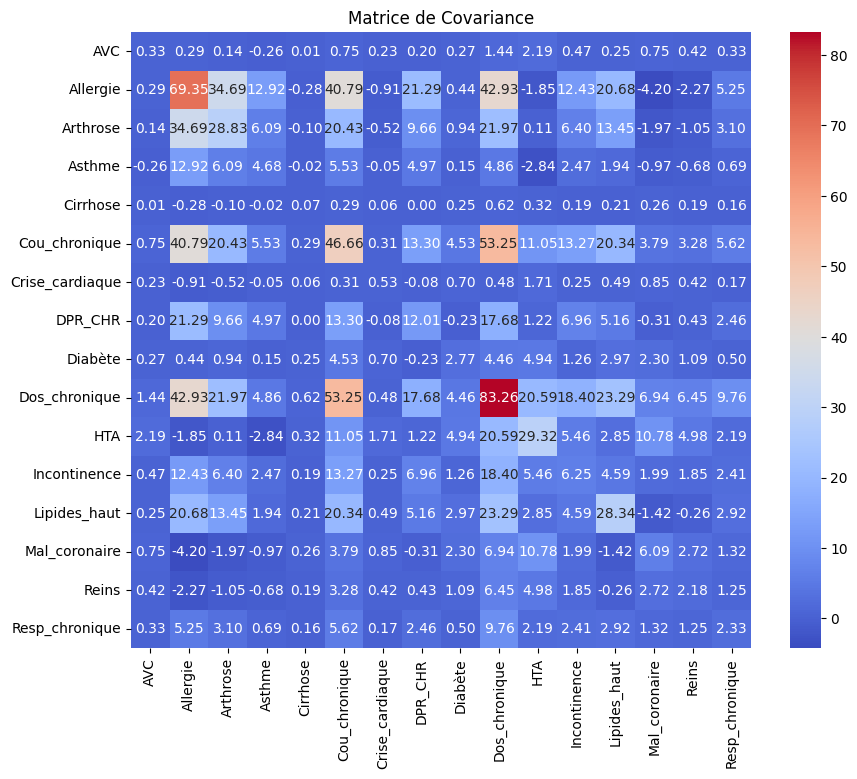

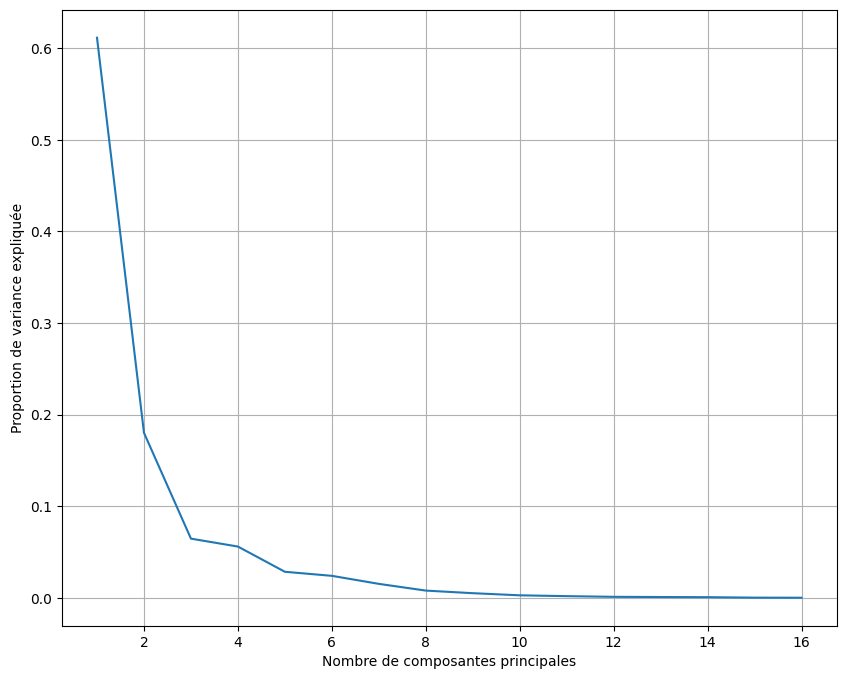

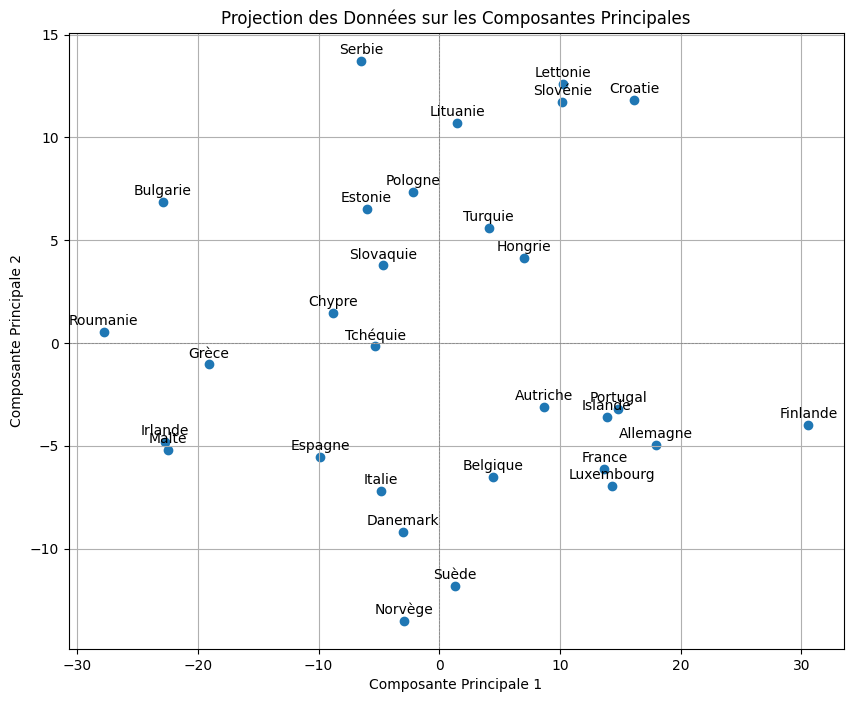

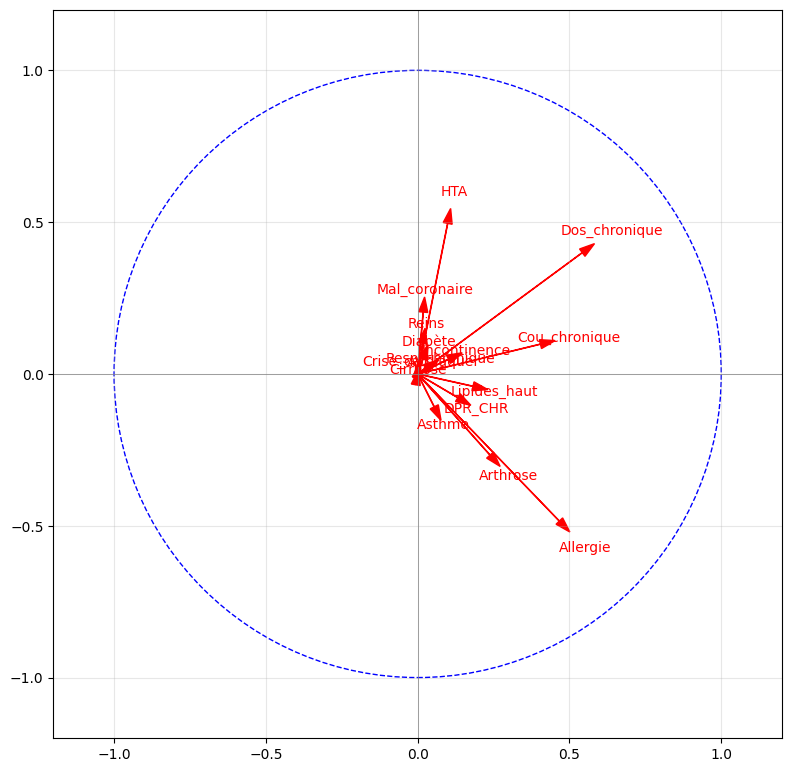

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Sélectionner les variables numériques
features = pivot_df4.columns[1:]

# Liste des payes à exclure , je vais exclus ces payes car sa nom est tres longue
excluded_entities4 = [
    "Union européenne - 27 pays (à partir de 2020)",
    "Union européenne - 28 pays (2013-2020)",
]

pivot_df4 = pivot_df4[~pivot_df4['Geo'].isin(excluded_entities4)]

# Standardisation des données (ACP non normée car les données sont en pourcentage)
X = pivot_df4[features].values

# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X)

# Matrice de covariance
cov_matrix = np.cov(X.T)

# Visualisation de la matrice de covariance avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=features, yticklabels=features)
plt.title('Matrice de Covariance')
plt.show()

display(HTML("""
<p><b>Interprétation :</b> On a par exemple les chômeurs et les personnes non occupées ont une forte interdépendance positive (119.07), 
tandis que les retraités et les salariés montrent une faible relation (63.50). Les autres relations sont modérées.</p>
"""))

# Inertie expliquée par chaque composant
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.grid()
plt.show()

display(HTML("""
<p><b>Interprétation :</b> Comme nous pouvons le voir les premiers composants expliquent une grande partie de la variance des données. Cela suggère que les données peuvent être résumées de manière efficace en utilisant un nombre réduit de composants.</p>
"""))

# Graphe des pays avec leur nom
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i in range(len(pivot_df4)):
    plt.annotate(pivot_df4['Geo'].iloc[i], (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

display(HTML("""
<p><b>Interprétation :</b> Ce graphe montre la projection des données sur les composantes principales. Les pays qui sont proches les uns des autres sur le graphe ont des caractéristiques similaires par exemple il y a une grande similairité entre Slovaquie, la Lituanie et la Croatie, tandis que les pays qui sont éloignés les uns des autres ont des caractéristiques différentes.</p>
"""))

# Cercle de corrélation
def plot_correlation_circle(pca, features, figsize=(8, 8)):
    # Ne prendre que les deux premières composantes
    n_comp = 2
    
    # Calculer les corrélations entre les variables et les composantes
    correlations = np.zeros((len(features), n_comp))
    for i in range(len(features)):
        correlations[i, :] = pca.components_[:n_comp, i] * np.sqrt(pca.explained_variance_[:n_comp])
    
    # Normaliser les corrélations
    scaling = np.sqrt(pca.explained_variance_[:n_comp])
    correlations = correlations / scaling
    
    # Créer la figure avec un aspect ratio égal
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')
    
    # Tracer le cercle unitaire en pointillés bleus
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='--', linewidth=1)
    ax.add_artist(circle)
    
    # Tracer les flèches et labels en rouge
    for i in range(len(features)):
        # Tracer les flèches
        ax.arrow(0, 0, correlations[i, 0], correlations[i, 1],
                head_width=0.03, head_length=0.05, 
                fc='red', ec='red', 
                length_includes_head=True)
        
        # Ajouter les labels sans fond
        x_text = correlations[i, 0] * 1.1
        y_text = correlations[i, 1] * 1.1
        ax.text(x_text, y_text, features[i], 
                color='red',
                ha='center', va='center')
    
    # Configurer les axes
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)
    
    # Configurer les limites
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    
    # Ajouter une grille
    plt.grid(True, linestyle='-', alpha=0.3)
    
    # Supprimer les labels des axes pour correspondre à l'exemple
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')
    
    # Ajuster les graduations
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))
    
    plt.tight_layout()
    plt.show()
    
    return correlations

# Utiliser la fonction
correlations = plot_correlation_circle(pca, features)
display(HTML("""
<p><b>Interprétation du cercle des corrélations :</b></p>
<p>Le cercle des corrélations met en évidence plusieurs relations importantes :</p>
<ul>
    <li>Les "Personnes_occupées_sauf_salariés" et la "Population" sont fortement corrélées positivement (flèches proches)</li>
    <li>Les "Retraités" et les "Chômeurs" sont corrélés négativement (flèches opposées)</li>
    <li>Les "Personnes_non_occupées" semblent moins bien représentées dans ce plan (flèche plus courte)</li>
</ul>
"""))


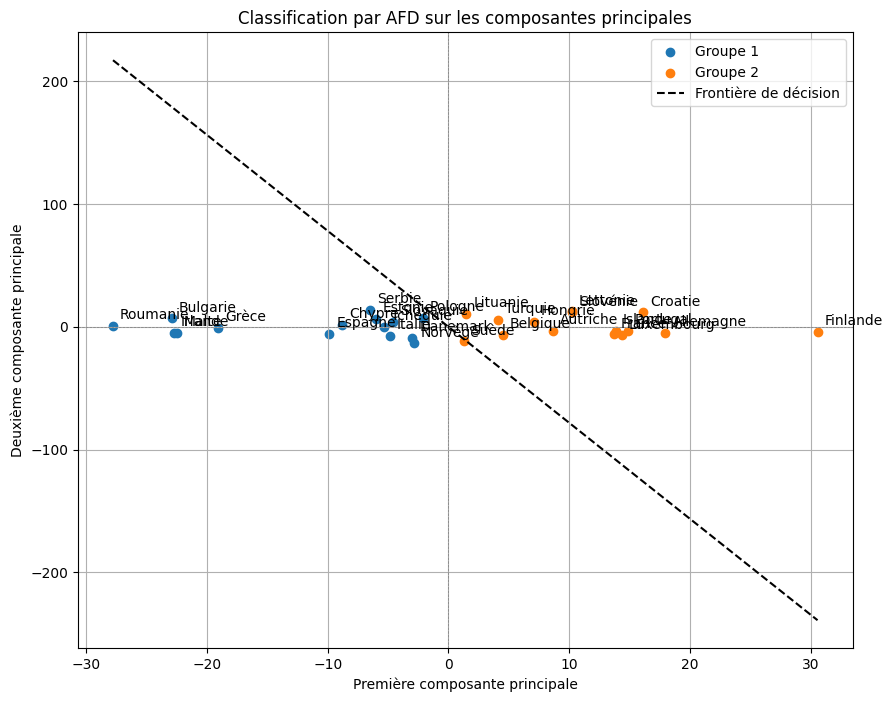

Score de classification : 0.97

Coefficients de l'AFD :
[[0.33111732 0.04234131]]

Comparaison des groupes réels et prédits :
Allemagne: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
Autriche: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
Belgique: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
Bulgarie: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Chypre: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Croatie: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
Danemark: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Espagne: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Estonie: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Finlande: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
France: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
Grèce: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Hongrie: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
Irlande: Groupe réel - Groupe 1, Groupe prédit - Groupe 1
Islande: Groupe réel - Groupe 2, Groupe prédit - Groupe 2
I

In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. D'abord, nous allons créer des classes basées sur la première composante principale
# pour avoir une classification supervisée
def create_groups(X_pca):
    # Utiliser la médiane de la première composante pour créer 2 groupes
    median_pc1 = np.median(X_pca[:, 0])
    groups = ['Groupe 1' if x <= median_pc1 else 'Groupe 2' for x in X_pca[:, 0]]
    return np.array(groups)

# Créer les groupes
y = create_groups(X_pca)

# 2. Appliquer l'AFD
lda = LinearDiscriminantAnalysis()
# Nous utilisons les deux premières composantes principales comme features
X_lda = lda.fit_transform(X_pca[:, :2], y)

# 3. Visualisation des résultats
plt.figure(figsize=(10, 8))

# Tracer les points pour chaque groupe
for groupe in np.unique(y):
    mask = y == groupe
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=groupe)
    
    # Ajouter les labels des pays
    for i, (x, y_coord) in enumerate(zip(X_pca[mask, 0], X_pca[mask, 1])):
        plt.annotate(pivot_df4['Geo'].iloc[np.where(mask)[0][i]], 
                    (x, y_coord), 
                    xytext=(5, 5), 
                    textcoords='offset points')

# Tracer la droite de séparation de l'AFD
# Calculer les points pour tracer la ligne de décision
mins = X_pca.min(axis=0)
maxs = X_pca.max(axis=0)
w = lda.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(mins[0], maxs[0])
yy = a * xx - (lda.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k--', label='Frontière de décision')

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Classification par AFD sur les composantes principales')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

# 4. Évaluation de la classification
# Calculer le score de classification
score = lda.score(X_pca[:, :2], y)
print(f"Score de classification : {score:.2f}")

# Afficher les coefficients de l'AFD
print("\nCoefficients de l'AFD :")
print(lda.coef_)

# 5. Prédictions pour de nouvelles données
predictions = lda.predict(X_pca[:, :2])
print("\nComparaison des groupes réels et prédits :")
for i, (real, pred) in enumerate(zip(y, predictions)):
    print(f"{pivot_df4['Geo'].iloc[i]}: Groupe réel - {real}, Groupe prédit - {pred}")

------------------------------------


## II. Blessures lors d'accidents *(DataSet Groupe)* : Hamza OUADOUD

**1. Personnes déclarant un accident entraînant des blessures** par sexe, âge et **degré d'urbanisation**.



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Inspection des données :**
* Affichage des données bruts

In [52]:
df5 = eurostat.get_data_df('hlth_ehis_ac1u')
df5.sample(5)

,freq,accident,deg_urb,sex,age,unit,geo\TIME_PERIOD,2014,2019
24245,A,RD_TRF,DEG3,F,Y25-64,PC,DK,1.3,NaN
1609,A,HOM,DEG1,T,Y65-74,PC,BE,2.8,3.2
3808,A,HOM,DEG3,F,Y45-54,PC,MT,0.0,NaN
17183,A,LEIS,DEG3,F,Y15-24,PC,IS,13.9,2.8
8296,A,HOM_LEIS,DEG1,T,Y25-64,PC,IS,9.6,NaN


* Description des données : 

In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27360 entries, 0 to 27359
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             27360 non-null  object 
 1   accident         27360 non-null  object 
 2   deg_urb          27360 non-null  object 
 3   sex              27360 non-null  object 
 4   age              27360 non-null  object 
 5   unit             27360 non-null  object 
 6   geo\TIME_PERIOD  27360 non-null  object 
 7   2014             26648 non-null  float64
 8   2019             18348 non-null  float64
dtypes: float64(2), object(7)
memory usage: 1.9+ MB


* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles.
    - Colonnes avec des types de données inappropriés.
    - Colonnes illisibles.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Nettoyage des données :**
* Sélection des colonnes utiles : 

In [54]:
df5 = df5[['geo\\TIME_PERIOD','age','sex','accident','deg_urb','2019']]
df5.head(3)

,geo\TIME_PERIOD,age,sex,accident,deg_urb,2019
0,AT,TOTAL,F,HOM,DEG1,6.6
1,BE,TOTAL,F,HOM,DEG1,5.2
2,BG,TOTAL,F,HOM,DEG1,2.0


* Renommage des colonnes :

In [55]:
df5 = df5.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'deg_urb':'Degré_urbanisation',
    'accident':'Accident'
})
df5.head(0)

,Geo,age,sex,Accident,Degré_urbanisation,2019


* Remplacement des codes pays par leur nom complet :

In [56]:
ds5_coutry_code = {
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "UK": "United Kingdom",
    "RS": "Serbie",
    "TR": "Turquie"
}
df5['Geo'] = df5['Geo'].replace(ds5_coutry_code)

* Remplacement des codes de sexe par leur nom complet :

In [57]:
df5['sex'] = df5['sex'].replace({'M': 'Male', 'F': 'Female','T':'Total'})

* Remplacement des codes d'Accident et Degré urbanisation :


In [58]:
# Suppression des lignes où 'Degré_urbanisation' contient 'TOTAL'
df5 = df5[~df5['Degré_urbanisation'].isin(['TOTAL'])]

ds5_accident_code = {
    "RD_TRF": "Trafic routier",
    "HOM_LEIS": "Domicile et loisir",
    "HOM": "Domicile",
    "LEIS": "Loisir"
}

ds5_Degré_urbanisation_code = {
    "DEG1": "Villes",
    "DEG2": "Villes_moins_peuplées_et_banlieues",
    "DEG3": "Zones_rurales"
}

# Remplacer les codes dans 'Accident' par les descriptions complètes
df5['Accident'] = df5['Accident'].replace(ds5_accident_code)

# Remplacer les codes dans 'Degré_urbanisation' par les descriptions complètes
df5['Degré_urbanisation'] = df5['Degré_urbanisation'].replace(ds5_Degré_urbanisation_code)

* Remplissage des valeurs manquantes pour l'année 2019 :


In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2014)
df5['2019'] = df5.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 en cas que toutes les années contient des valeur null
df5 = df5[df5['2019'].notna()]  

* Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [60]:
df5 = df5[df5['sex'] =="Total"]

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Présentation des données final :**
* Affichage des données après nettoyage :

In [61]:
df5.sample(8)

,Geo,age,sex,Accident,Degré_urbanisation,2019
4809,Islande,Y25-29,Total,Domicile,Zones_rurales,2.4
5072,Union européenne - 27 pays (à partir de 2020),Y_GE65,Total,Domicile,Zones_rurales,5.2
25594,Finlande,Y_GE65,Total,Trafic routier,Zones_rurales,0.5
11870,Bulgarie,Y65-74,Total,Domicile et loisir,Zones_rurales,1.7
8037,Norvège,Y15-19,Total,Domicile et loisir,Villes,8.0
8462,Croatie,Y65-74,Total,Domicile et loisir,Villes,5.9
1279,Allemagne,Y15-44,Total,Domicile,Villes,6.5
1162,Malte,TOTAL,Total,Domicile,Villes,2.5


* Pivotage des données :

In [62]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df5 = df5.pivot_table(
    index=['Geo','Degré_urbanisation'],  
    columns='Accident',  
    values='2019',  
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df5 = pivot_df5.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df5 = pivot_df5.round(2)

pivot_df5.head(6)

Accident,Geo,Degré_urbanisation,Domicile,Domicile et loisir,Loisir,Trafic routier
0,Allemagne,Villes,5.18,13.16,9.85,2.63
1,Allemagne,Villes_moins_peuplées_et_banlieues,5.53,13.70,10.07,2.24
2,Allemagne,Zones_rurales,5.22,12.21,8.41,2.14
3,Autriche,Villes,5.96,13.00,8.03,1.73
4,Autriche,Villes_moins_peuplées_et_banlieues,4.80,12.86,8.81,2.07
5,Autriche,Zones_rurales,5.27,11.82,7.22,1.64


* Sauvegarder le résultat

In [63]:
pivot_df.to_excel('Personnes_déclarant_accident_entraînant_blessures_par_sex_âge_degré_urbanisation_2019.xlsx', index=False)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Application des Methodes**

Dans cette partie, nous allons étudier l'association entre deux variables qualitatives : le **Degré urbanisation** (Villes, Villes moins peuplées et banlieues, Zones rurales) et le **type accident** (Domicile, Domicile et loisir Loisir, Trafic routier). 

L'objectif est de comprendre s'il existe des préférences ou des tendances spécifiques entre les types accident et les Degré urbanisation.
* Application : 

Accident,Domicile,Domicile et loisir,Loisir,Trafic routier
Degré_urbanisation,,,,
Villes,2.924688,7.082813,4.740312,1.415625
Villes_moins_peuplées_et_banlieues,3.242188,6.960000,4.269687,1.274687
Zones_rurales,3.233125,6.451250,3.696875,1.260625


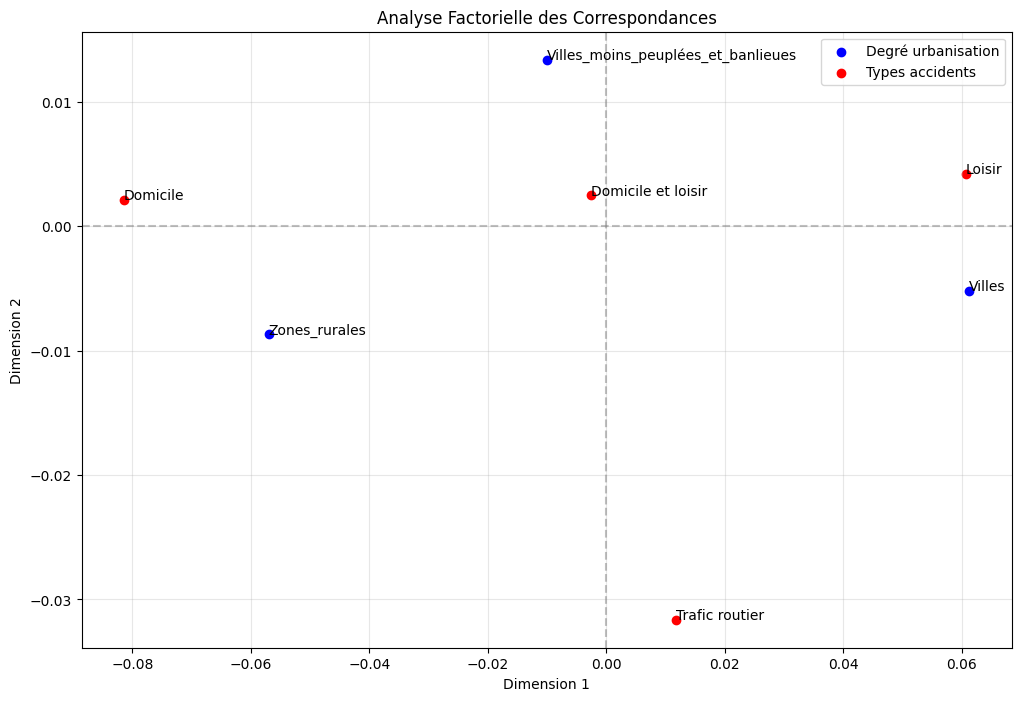


Contributions des modalités lignes :
                                           0         1
Villes                              0.553235  0.099552
Villes_moins_peuplées_et_banlieues  0.014260  0.647482
Zones_rurales                       0.432505  0.252967

Contributions des modalités colonnes :
                           0         1
Domicile            0.566956  0.009891
Domicile et loisir  0.001274  0.029474
Loisir              0.426696  0.051970
Trafic routier      0.005074  0.908665


In [87]:
import pandas as pd
import numpy as np
from prince import CA
import matplotlib.pyplot as plt

# Création de la table de contingence
table_contingence = pivot_df5.pivot_table(
    index='Degré_urbanisation',
    values=['Domicile', 'Domicile et loisir', 'Loisir', 'Trafic routier'],
    aggfunc='mean'
)

display(HTML("""
<h3><b>Affichage de table de contigence </b></h3>
"""))

display(table_contingence)

# Application de l'AFC
afc = CA(n_components=2)
afc_coords = afc.fit(table_contingence)

# Récupération des coordonnées
row_coords = afc.row_coordinates(table_contingence)
col_coords = afc.column_coordinates(table_contingence)

# Création du graphique
plt.figure(figsize=(12, 8))

# Affichage des points lignes (Degré d'urbanisation)
plt.scatter(row_coords.iloc[:, 0], row_coords.iloc[:, 1], color='blue', label='Degré urbanisation')
for i, row in enumerate(row_coords.index):
    plt.annotate(row, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]))

# Affichage des points colonnes (Types d'accidents)
plt.scatter(col_coords.iloc[:, 0], col_coords.iloc[:, 1], color='red', label='Types accidents')
for i, col in enumerate(col_coords.index):
    plt.annotate(col, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]))
display(HTML("""
<h3><b>Affichage du graphique</b></h3>
"""))

display(HTML("""
<p><b>Interprétation :</b></p>
<p>L'interprétation sur ce graphique repose donc avant tout sur la proximité des points : plus les modalités sont proches, plus elles sont associées.
Et donc on obtient les résultats suivant : </p>
<ul style="display:flexbox; gap:50px; margin-bottom:20px;">
    <li><b>Association entre "Villes" et "Loisir" : </b>
        Ces points sont proches sur le graphique, ce qui indique que les accidents de loisir sont plus fréquents dans les zones urbaines que dans les autres types de zones. Cela pourrait s'expliquer par la plus grande concentration d'activités de loisirs dans les villes.
    <br/></li>
    <li><b>Association entre "Zones rurales" et "Domicile" : </b>
        Le graphique montre une association forte entre les zones rurales et les accidents domestiques, suggérant que les accidents à domicile sont proportionnellement plus nombreux dans les zones rurales. Cela pourrait être lié à la nature des activités domestiques en milieu rural.
    <br/></li>
    <li><b>Association entre "Villes moins peuplées et banlieues" et "Domicile et loisir" : </b>
        Ces points sont relativement proches, indiquant que les accidents combinant domicile et loisir sont plus caractéristiques des zones périurbaines. Cela pourrait refléter un mode de vie spécifique à ces zones intermédiaires.
    <br/></li>
    <li><b>Position de "Trafic routier" : </b>
        Ce type d'accident est positionné de manière distincte, plus bas sur l'axe vertical, suggérant un profil d'accident particulier moins lié à un type spécifique d'urbanisation. Cela indique que les accidents de la route se produisent dans tous les contextes urbains, mais avec des caractéristiques différentes.
    <br/></li>
</ul>
"""))
# Paramètres du graphique
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.title("Analyse Factorielle des Correspondances")
plt.xlabel(f"Dimension 1")
plt.ylabel(f"Dimension 2")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()
display(HTML("""
<h3><b>Les Contributions</b></h3>
"""))
# Affichage des contributions
print("\nContributions des modalités lignes :")
print(afc.row_contributions_)
print("\nContributions des modalités colonnes :")
print(afc.column_contributions_)

--------------------------------------------------------------------